# Cap. 4 - Núcleo da Linguagem Python, Parte II

Este capítulo dá continuidade a apresentação da linguagem Python que começamos no Cap. 2.

## **Serviços do sistema operacional**

**Módulo sys**

O módulo *sys* disponibiliza diversas funções e parâmetros relacionados ao interpretador Python. Veremos apenas algumas dessas funcionalidades.


*sys.argv*

Lista os argumentos passados para um script Python. Devemos fazer isso pelo terminal.




In [ ]:
import sys

In [ ]:
#são os argumentos usados ao chamar o Python via colab
sys.argv

In [ ]:
script = """
# quadrado.py
import sys

n = int(sys.argv[1])
print(n, 'ao quadrado é ', n**2)
"""

with open('quadrado.py', 'w') as f:
    f.writelines(script)

In [ ]:
#o que for passado depois do nome do programa, vai para o sys.argv
!python quadrado.py 2

In [ ]:
script = """
# quadrado.py
import sys

print(sys.argv)
"""

with open('quadrado.py', 'w') as f:
    f.writelines(script)

In [ ]:
#note que o primeiro elemento é o nome do script
!python quadrado.py 2 fisica computacional 1/2.

**sys.exit**

Encerra um script Python.

In [ ]:
script = r"""
# quadrado.py
import sys

try:
    n = int(sys.argv[1])
except (IndexError, ValueError):
    sys.exit('Entre com um inteiro, <n>, na linha de comando.\nUso: python {:s} <n>'.format(sys.argv[0]))

print(n, 'ao quadrado é ', n**2)
"""

with open('quadrado.py', 'w') as f:
    f.writelines(script)

In [ ]:
!python quadrado.py 'teste'

In [ ]:
!python quadrado.py 25

**Módulo os**

O módulo *os* disponibiliza funções relacionadas ao sistema operacional.

In [ ]:
import os

In [ ]:
#retorna informações sobre o sistema operacional
os.uname()

In [ ]:
#retorna o valor de variáveis ambientes do os
os.getenv('HOME'), os.getenv('PWD'), os.getenv('USER')

In [ ]:
#programas que estão no PATH são acessíveis em qualquer pasta
os.getenv('PATH')

*os.path* é um submódulo para manipular caminhos de arquivo:

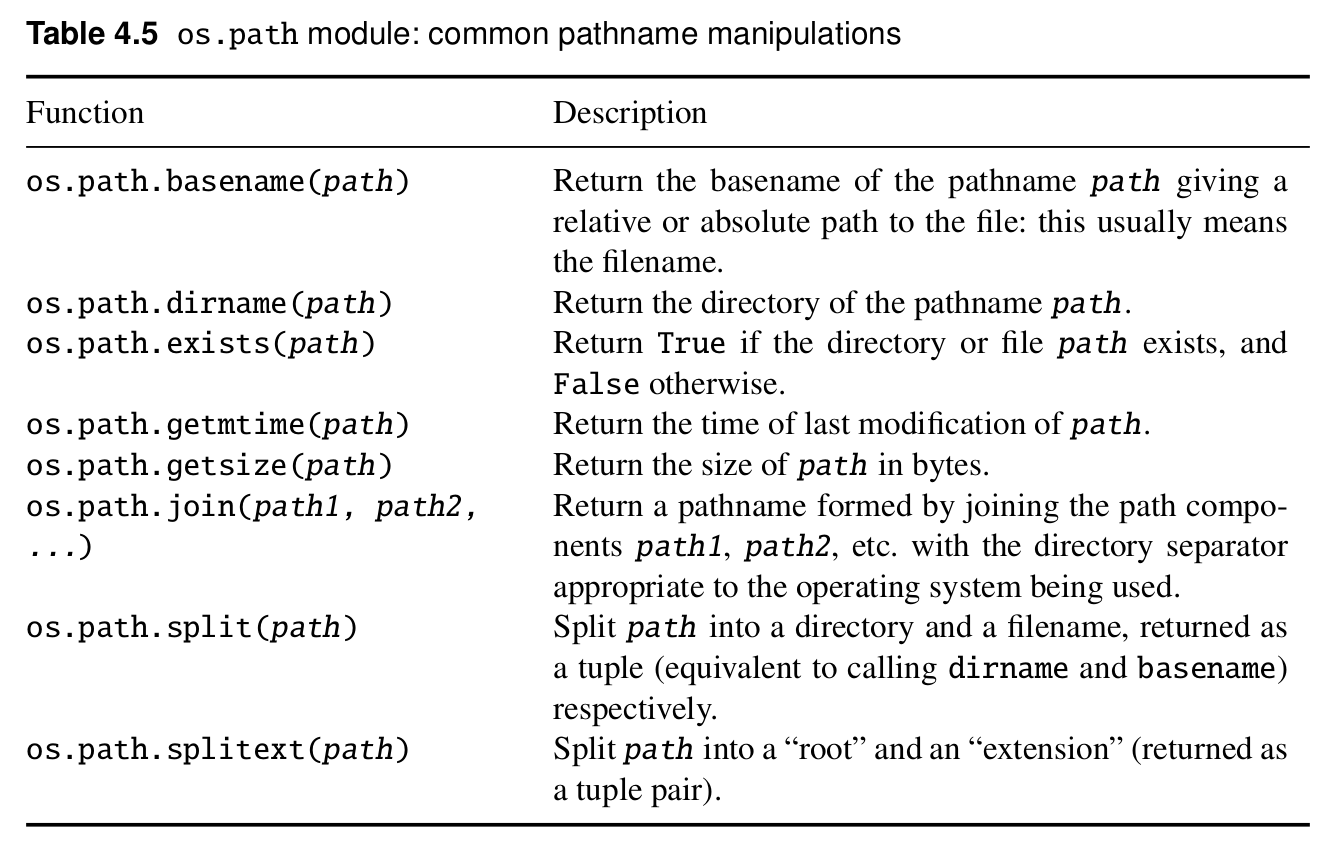

In [ ]:
#apenas o nome do arquivo
os.path.basename('/home/haroldo/teste.py')

In [ ]:
#apenas o nome da pasta
os.path.dirname('/home/haroldo/teste.py')

In [ ]:
#pasta e arquivo numa tupla
os.path.split('/home/haroldo/teste.py')

In [ ]:
#caminho do arquivo e sua extensão numa tupla
os.path.splitext('/home/haroldo/teste.pdf')

In [ ]:
#combina caminho e nome do arquivo
os.path.join(os.getenv('HOME'), 'teste.py')

In [ ]:
#verifica se caminho/arquivo existe
os.path.exists('/root/teste.py')

In [ ]:
os.path.exists('/root/')

In [ ]:
!echo 'teste' > teste.pdf

In [ ]:
os.path.exists('teste.pdf')

Outras funções do *os*

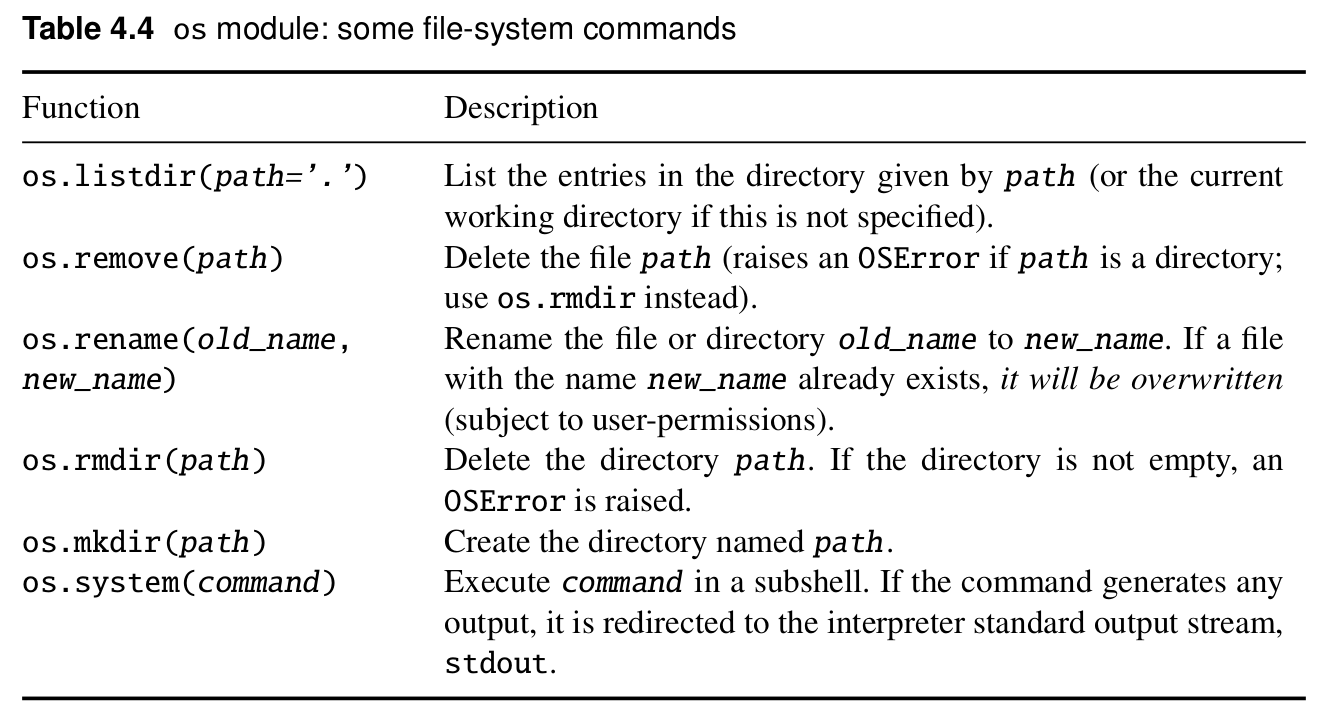

In [ ]:
#lista os arquivos
os.listdir()

In [ ]:
#lista os arquivos
os.listdir('sample_data')

In [ ]:
!echo 'teste' > teste2.pdf
os.listdir()

In [ ]:
#delete um arquivo, retorna erro caso o arquivo não exista
os.remove('teste22.pdf')

In [ ]:
#delete um arquivo
os.remove('teste2.pdf')

In [ ]:
os.listdir()

In [ ]:
!echo 'teste' > teste22.pdf

In [ ]:
os.listdir()

In [ ]:
#renomea arquivos
os.rename('teste22.pdf','nome_de_verdade.pdf')

In [ ]:
os.listdir()

In [ ]:
#cria pastas
os.mkdir('nova_pasta')

In [ ]:
os.listdir()

In [ ]:
#remove pastas
os.rmdir('nova_pasta')

In [ ]:
os.listdir()

In [ ]:
os.mkdir('nova_pasta')
!echo 'teste' > nova_pasta/teste22.pdf

In [ ]:
os.listdir('nova_pasta')

In [ ]:
#não remove pastas com arquivo
os.rmdir('nova_pasta')

In [ ]:
#executa comandos do sistema
os.system('echo 1 > arquivo.txt')

In [ ]:
os.listdir()

In [ ]:
#executa comandos do sistema
os.system('ps axu > processos.txt')

*Exemplo E4.16*: Suponha que tenhamos uma pasta com os seguintes arquivos:

* data-02-Feb-10.txt
* data-10-Oct-14.txt
* data-22-Jun-04.txt
* data-31-Dec-06.txt

e que precisamos mudar o padrão das datas para:


data-02-Feb-10.txt -> data-2010-02-02.txt

Para isso, podemos usar o código abaixo.

In [ ]:
import os

In [ ]:
import os

os.mkdir('pasta_teste')

flist = ['data-02-Feb-10.txt','data-10-Oct-14.txt',
         'data-22-Jun-04.txt','data-31-Dec-06.txt']

for file_ in flist:
    os.system(f"touch pasta_teste/{file_}")

In [ ]:
import os

months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
          'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

dir_name = 'pasta_teste'


for filename in os. listdir(dir_name):
    d, month, y = int(filename[5:7]), filename[8:11], int(filename[12:14])

    #retorna a posição na lista
    m = months.index(month.lower())+1

    newname = f'data-20{y:02d}-{m:02d}-{d:02d}.txt'
    newpath = os.path.join(dir_name, newname)
    oldpath = os.path.join(dir_name, filename)
    print(oldpath, '->', newpath)
    os.rename(oldpath, newpath)

In [ ]:
month.lower()

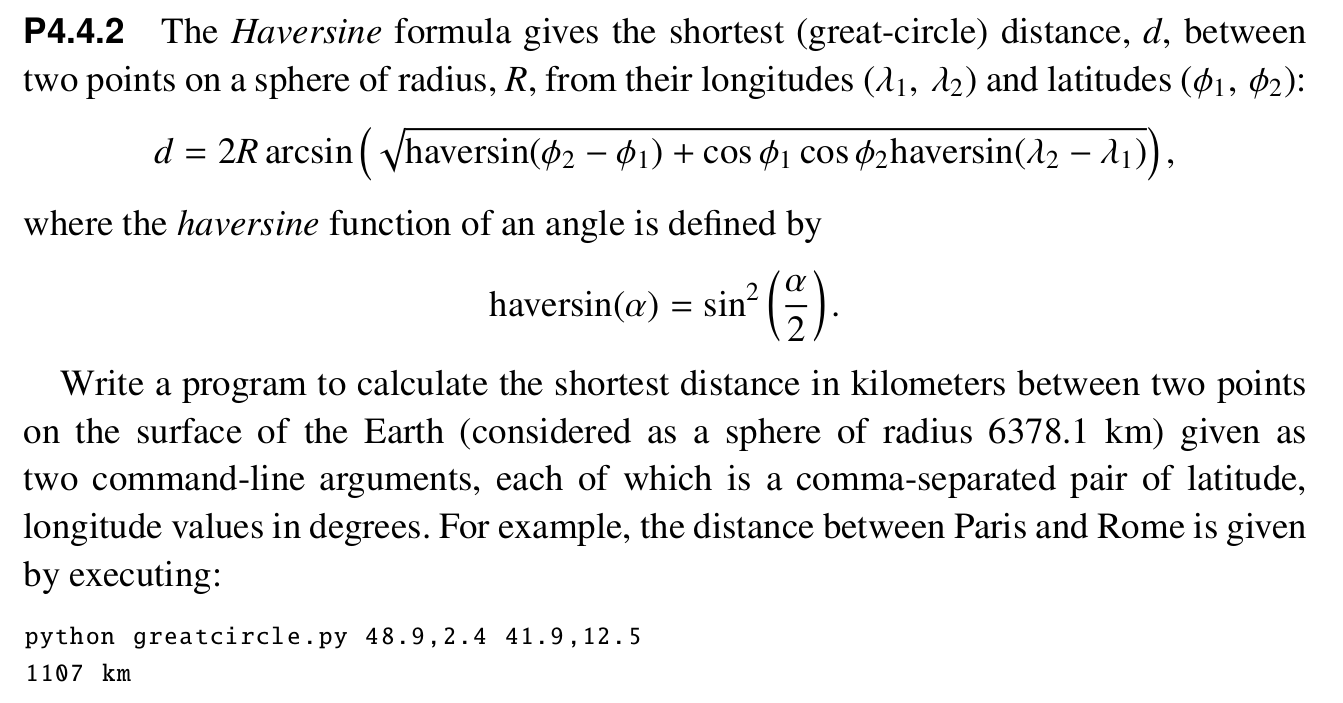

In [ ]:
import sys
import math

def haversin(alpha):
    return math.sin(alpha/2)**2

def distanciaGC(loc1, loc2, R=6378.1):
    """
    Retorna a distância great-circle entre os pontos
    loc1=(latitude1, longitude1) e loc2=(latitude, longitude)
    sobre uma esfera de raio R. loc1 e loc2 devem estar no formato
    (phi, lamdbda) em graus.
    """

    (phi1, lambda1), (phi2, lambda2) = loc1, loc2
    #converte para radiano
    phi1, lambda1 = math.radians(phi1), math.radians(lambda1)
    phi2, lambda2 = math.radians(phi2), math.radians(lambda2)

    d = 2 * R * math.asin(math.sqrt(haversin(phi2-phi1)
                + math.cos(phi1)*math.cos(phi2)*haversin(lambda2-lambda1)))
    return d

In [ ]:
mga = (23.4210, 51.9331)
lon = (23.3197, 51.1662)

In [ ]:
distanciaGC(mga, lon)

In [ ]:
distanciaGC((48.9,2.4), (41.9,12.5))

In [ ]:
script ="""import sys
import math

def haversin(alpha):
    return math.sin(alpha/2)**2

def distanciaGC(loc1, loc2, R=6378.1):
    (phi1, lambda1), (phi2, lambda2) = loc1, loc2
    #converte para radiano
    phi1, lambda1 = math.radians(phi1), math.radians(lambda1)
    phi2, lambda2 = math.radians(phi2), math.radians(lambda2)

    d = 2 * R * math.asin(math.sqrt(haversin(phi2-phi1)
                + math.cos(phi1)*math.cos(phi2)*haversin(lambda2-lambda1)))
    return d

loc1, loc2 = sys.argv[1:]

phi1, lambda1 = [float(x) for x in loc1.split(',')]
phi2, lambda2 = [float(x) for x in loc2.split(',')]

print(f'{distanciaGC((phi1, lambda1), (phi2, lambda2)):.2f} km')
"""

with open('distancia.py', 'w') as f:
    f.writelines(script)

In [ ]:
!python distancia.py 48.9,2.4 41.9,12.5

In [ ]:
!python distancia.py 23.4210,51.9331 23.3197,51.1662

## **Módulos e pacotes**

Já vimos que o Python é uma linguagem modular, isto é, muitas funcionalidades estão disponíveis via importação de módulos:

* import <módulo>

Ao executar o comando anterior, o Python inclui o <módulo> no namespace e as funções do módulo ficam acessíveis via "notação ponto":

* <módulo>.\<atributo>

Você pode criar um módulo simples ao salvar um arquivo com as extensão .py. Esse nome não pode conter hífen ou começar com dígito e também não é bom usar nomes de outros módulos (math, random, numpy, etc).

Por exemplo, o código abaixo cria um .py chamado 'modulo_teste.py', o qual pode ser importado:

In [ ]:
script ="""import sys
import math

def haversin(alpha):
    return math.sin(alpha/2)**2

def distanciaGC(loc1, loc2, R=6378.1):
    (phi1, lambda1), (phi2, lambda2) = loc1, loc2
    #converte para radiano
    phi1, lambda1 = math.radians(phi1), math.radians(lambda1)
    phi2, lambda2 = math.radians(phi2), math.radians(lambda2)

    d = 2 * R * math.asin(math.sqrt(haversin(phi2-phi1)
                + math.cos(phi1)*math.cos(phi2)*haversin(lambda2-lambda1)))
    return d
"""

with open('modulo_teste.py', 'w') as f:
    f.writelines(script)

In [ ]:
import modulo_teste

In [ ]:
modulo_teste.haversin(1)

Um pacote Python nada mais é do que uma maneira de organizar módulos e distribuir projetos em Python.

Para fazer um pacote, devemos criar uma estrutura de arquivos no formato:

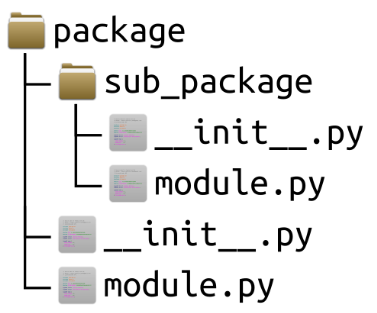

No exemplo anterior, temos um pacote com um módulo e um submódulo. Os arquivos '\_\_init\_\_.py' são executados ao carregar o módulo e podem ser usados para executar códigos de preparação ou inicialização.

**Cuidado ao instalar e importar módulos desconhecidos!**

Um outro exemplo de pacote é o *numpy*:



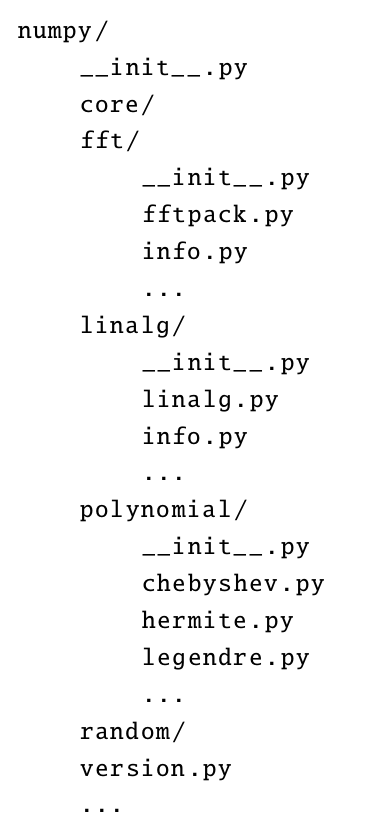

In [ ]:
import numpy.polynomial.legendre

In [ ]:
numpy.polynomial.legendre.Legendre([1,2])

In [ ]:
from numpy.polynomial import legendre

In [ ]:
legendre.Legendre([1,2])

Uma das maneiras mais simples para se instalar um módulo Python é usar o 'pip':

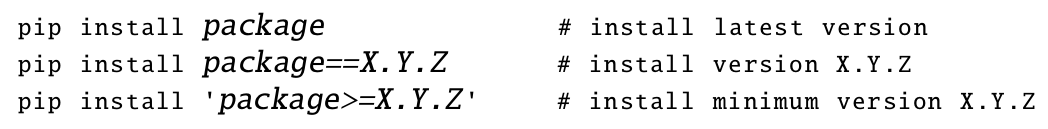

Para remover um módulo usamos:


```
pip uninstall <nome do módulo>
```

Abaixo temos uma lista de módulos comuns:


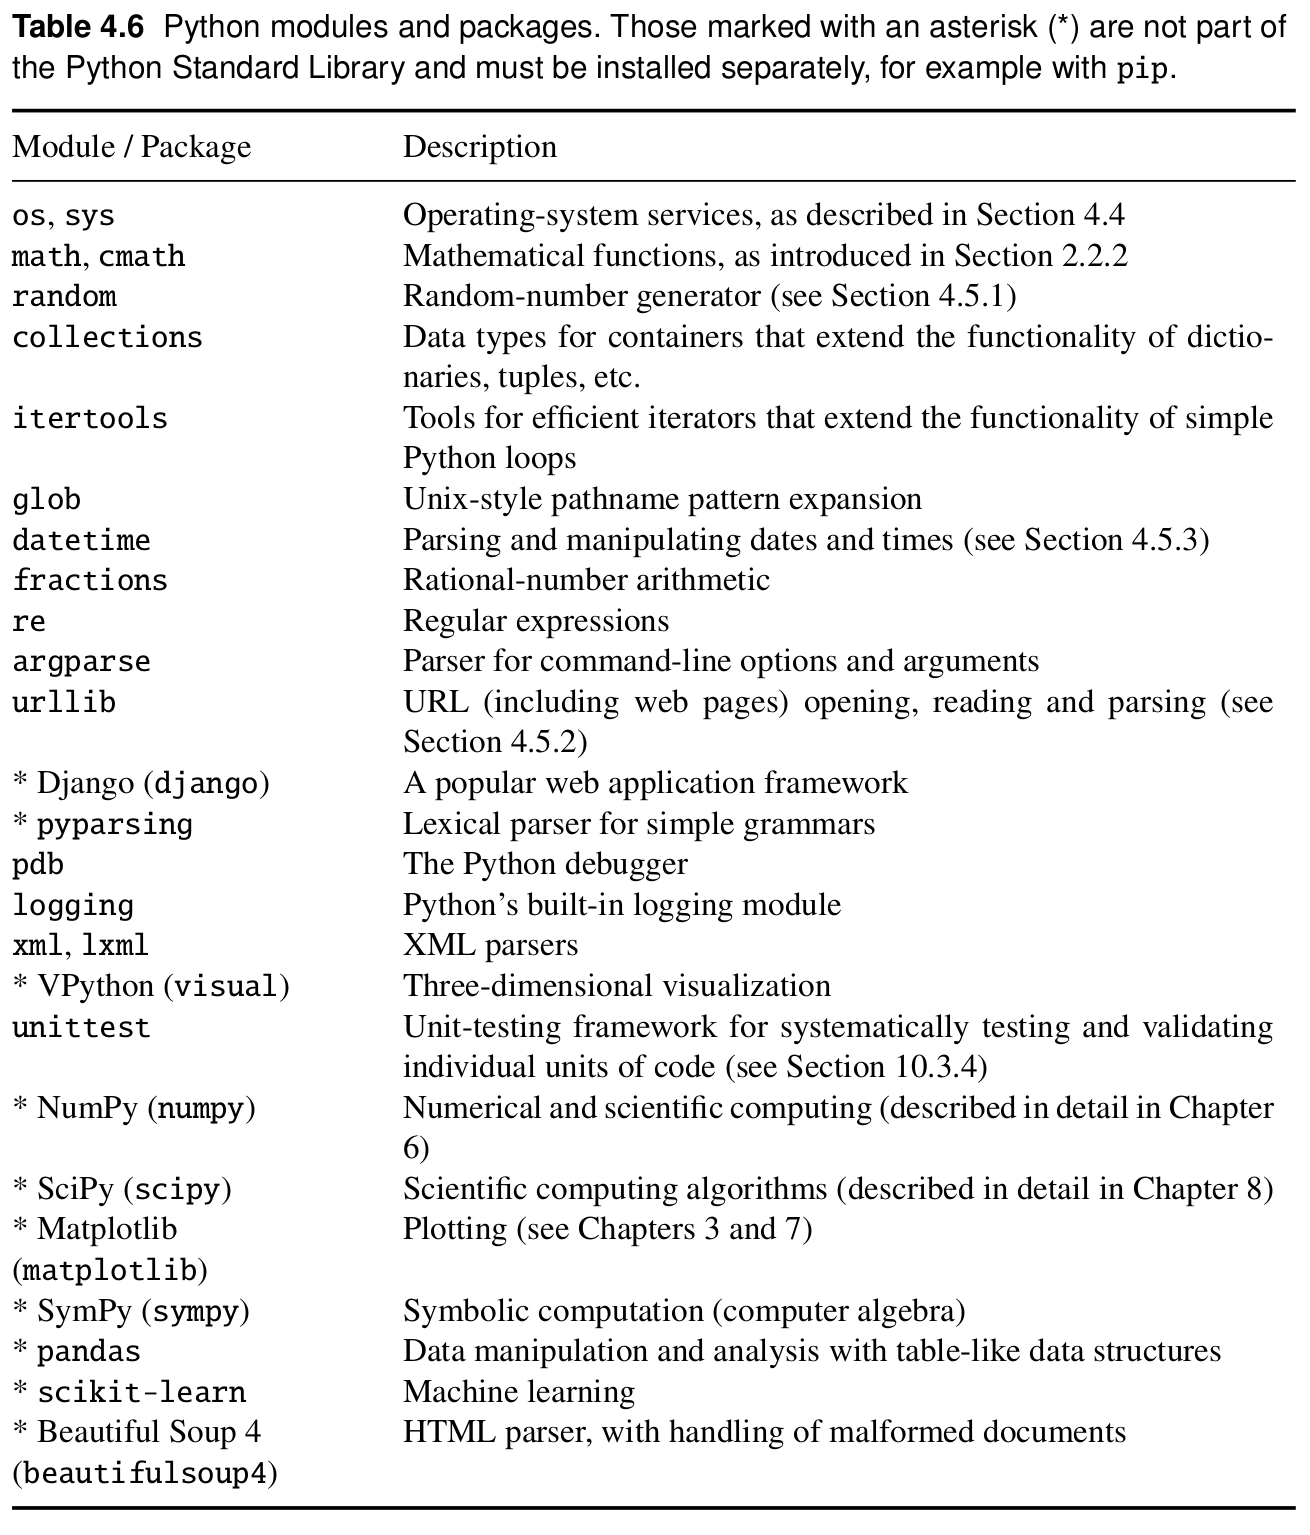

**Módulo random**

Em muitos casos é preciso gerar e utilizar números aleatórios. Python implementa geradores de números *pseudo* aleatórios (pseudorandom-number generator - PRNG). Esses geradores aproximam as propriedades de números verdadeiramente aleatórios, mas as sequências de números geradas são sempre as mesmas dada uma semente (*seed*) inicial. Assim, os números pseudo aleatórios são, em algum sentido, determinísticos. Essa sequência gerada normalmente apresenta um período, porém, bons algoritmos apresentam períodos muito longos. Por exemplo, o módulo random implementa o algoritmo chamado [Mersenne Twister
](https://en.wikipedia.org/wiki/Mersenne_Twister), cujo período é $2^{19937} -1$, um número com mais de 6000 dígitos.

**Gerando números aleatórios**



In [ ]:
import random

Ao importar o módulo, o Python usa uma representação da hora do sistema (por exemplo, número de segundos que o sistema está ligado) como seed.

In [ ]:
#estado atual do gerador
random.getstate()

In [ ]:
#notar que os números são diferentes
random.seed(42)
random.getstate()

In [ ]:
random.seed(42)
#número aleatório uniforme [0,1]
[random.random() for _ in range(10)]

In [ ]:
#note que fixar a seed implica fixar a sequência gerada
random.seed(42)
[random.random() for _ in range(10)]

In [ ]:
random.seed(41)
[random.random() for _ in range(10)]

In [ ]:
#chamar sem argumento, inclui um valor qualquer como seed
random.seed()
[random.random() for _ in range(10)]

In [ ]:
#gera número aleatório no intervalo [a,b]
a,b=0,10
random.uniform(a,b)

Existem muitas distribuições já implementadas:

https://docs.python.org/3/library/random.html


In [ ]:
#gaussiana
[random.gauss(0,2.) for _ in range(5)]

In [ ]:
#gaussiana
[random.gauss(0,2.) for _ in range(5)]

In [ ]:
#uniforme nos inteiros
[random.randint(1, 6) for _ in range(10)]

O módulo *random* também permite gerar sequências aleatórias.

* random.choice(LISTA): seleciona ao acaso 1 elemento da lista;
* random.choices(LISTA,k=k): seleciona ao acaso k elementos da lista;
* random.shuffle(LISTA): embaralha os elementos da lista *in place*;
* random.sample(LISTA,k=k): seleciona ao k elementos *únicos* da lista (amostra sem substituição).

In [ ]:
seq = [10 , 5, 2, 'ni ', -3.4]
random.choice(seq)

In [ ]:
random.choice(seq)

In [ ]:
#a lista é modificada
random.shuffle(seq)

In [ ]:
seq

In [ ]:
range10k = range(1,10000+1)
random.sample(range10k, 5)

In [ ]:
range10k = list(range(1,10+1))
random.sample(range10k, 10)

In [ ]:
#retorna erro se a amostra for maior que a população
random.sample(range10k, 11)

In [ ]:
#não retorna erro, mas gera elementos repetidos
random.choices(range10k,k=11)

*Exemplo E4.17:* O problema de [Monty Hall](https://en.wikipedia.org/wiki/Monty_Hall_problem).

* três objetos estão escondidos atrás de três portas: um carro e duas cabras;
* você escolhe uma das portas;
* das duas portas não escolhidas, o apresentador abre uma que não contém o carro;
* e pergunta se você quer ou não trocar de porta.

Qual é a melhor estratégia?

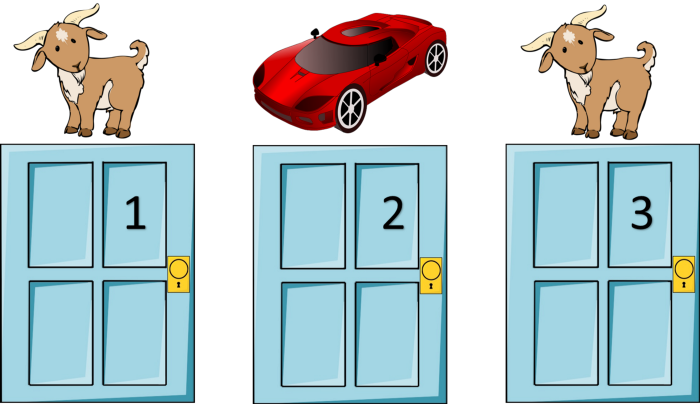

Vamos simular o problema, mas a melhor estratégia é mudar de porta!

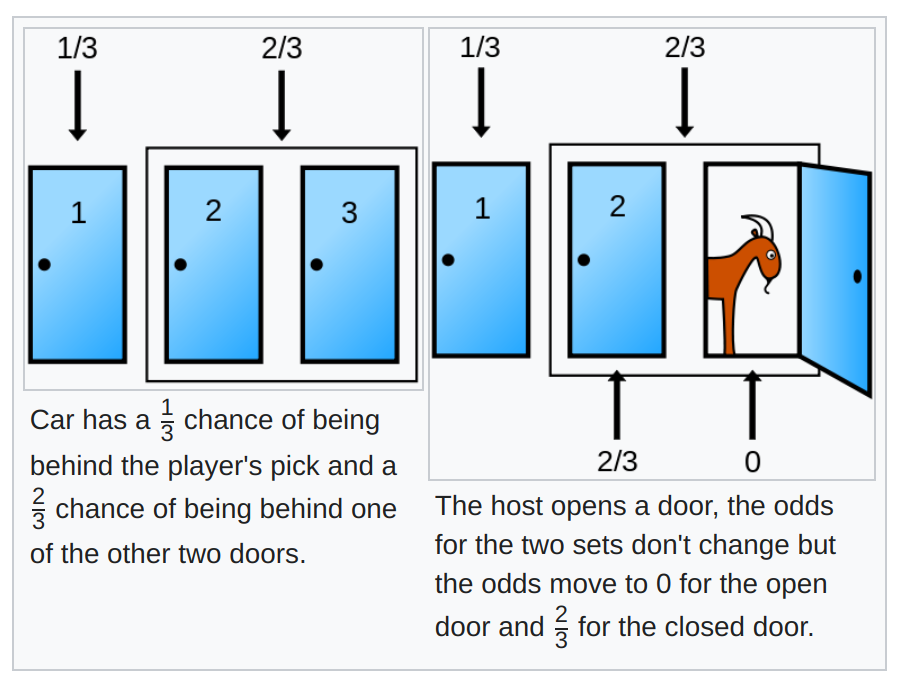

In [ ]:
trocar_de_porta = True
nportas = 3 #>2
portas = list(range(nportas))
possiveis_resultados = ['carro']+['cabra']*(nportas-1)

In [ ]:
portas,possiveis_resultados

In [ ]:
realizacao = random.sample(possiveis_resultados,k=nportas)

In [ ]:
realizacao

In [ ]:
portas_disponiveis = portas.copy()
porta_sel = random.randint(0,nportas-1)
portas_disponiveis.remove(porta_sel)

In [ ]:
porta_sel, portas_disponiveis

In [ ]:
for mostra_porta in portas_disponiveis:
    if realizacao[mostra_porta]=='cabra':
        portas_disponiveis.remove(mostra_porta)
        break

In [ ]:
portas_disponiveis

In [ ]:
if trocar_de_porta:
    porta_sel = random.choice(portas_disponiveis)
porta_sel

In [ ]:
realizacao[porta_sel]=='carro'

In [ ]:
def uma_realizacao(nportas=3, trocar_de_porta=True):
    portas = list(range(nportas))
    possiveis_resultados = ['carro']+['cabra']*(nportas-1)

    realizacao = random.sample(possiveis_resultados,k=nportas)

    portas_disponiveis = portas.copy()
    porta_sel = random.randint(0,nportas-1)
    portas_disponiveis.remove(porta_sel)

    for mostra_porta in portas_disponiveis:
        if realizacao[mostra_porta]=='cabra':
            portas_disponiveis.remove(mostra_porta)
            break

    if trocar_de_porta:
        porta_sel = random.choice(portas_disponiveis)


    return 1 if realizacao[porta_sel]=='carro' else 0

In [ ]:
import numpy as np

In [ ]:
uma_realizacao()

In [ ]:
np.asarray([uma_realizacao() for _ in range(100)])

In [ ]:
np.mean(np.asarray([uma_realizacao() for _ in range(10000)]))

In [ ]:
np.mean(np.asarray([uma_realizacao(trocar_de_porta=False) for _ in range(10000)]))

In [ ]:
for nportas in range(3,10+1):
    trocando=np.mean(np.asarray([uma_realizacao(nportas=nportas) for _ in range(10000)]))
    nao_trocando=np.mean(np.asarray([uma_realizacao(nportas=nportas,trocar_de_porta=False) for _ in range(10000)]))
    print(nportas,trocando,nao_trocando)

When first presented with the Monty Hall problem, an overwhelming majority of people assume that each door has an equal probability and conclude that switching does not matter. Out of 228 subjects in one study, only 13% chose to switch. In his book The Power of Logical Thinking, cognitive psychologist Massimo Piattelli Palmarini writes:

> "No other statistical puzzle comes so close to fooling all the people all the time even Nobel physicists systematically give the wrong answer, and that they insist on it, and they are ready to berate in print those who propose the right answer."

Pigeons repeatedly exposed to the problem show that they rapidly learn to always switch, unlike human:

* [Are Birds Smarter Than Mathematicians? Pigeons (Columba livia) Perform Optimally on a Version of the Monty Hall Dilemma](https://psycnet.apa.org/fulltext/2010-03252-001.html).

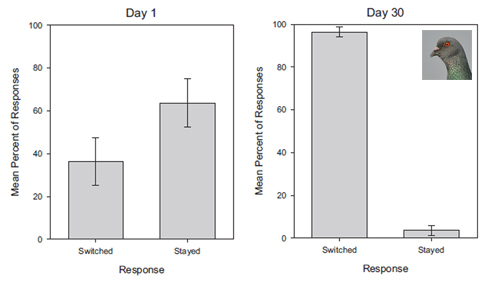

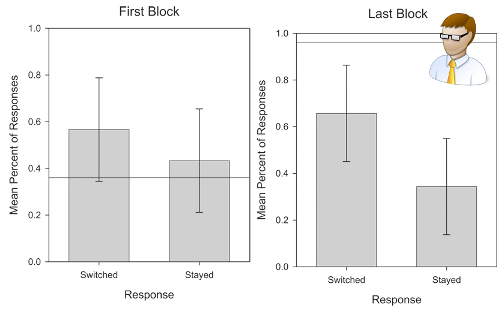

**Módulo urllib**

Oferece funções para receber conteúdo a partir de URLs HTTP(S) ou FTP.

Vamos apenas ilustrar algumas de suas funções.

In [ ]:
import urllib.request

#cria uma requisição para a página
req = urllib.request.Request('https://complex.pfi.uem.br')

In [ ]:
#abre a URL como um arquivo
response = urllib.request.urlopen(req)

In [ ]:
response

In [ ]:
page_html = response.read()

In [ ]:
print(page_html.decode('utf-8'))

Existem módulos melhores para extrair informação de páginas. Por exemplo,

* [Beautiful Soup](https://beautiful-soup-4.readthedocs.io/en/latest/)
* [scrapy](https://scrapy.org/)

Vamos ilustrar um pouco o Beautiful Soup.

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
soup = BeautifulSoup(page_html.decode('utf-8'), 'html.parser')


In [ ]:
soup.title

In [ ]:
soup.find_all('div', {'class': 'portrait-title'})

In [ ]:
pessoas = soup.find_all('div', {'class': 'portrait-title'})

In [ ]:
for pessoa in pessoas:
    print(pessoa.h2.text)
    for link in pessoa.find_all('a'):
        print(link.get('href'))
    print('\n')

**Módulo datetime**

Esse módulo fornece funções para lidar com datas e horas.

Para criar o um objeto do tipo data usamos:

In [ ]:
from datetime import date

In [ ]:
data_nascimento = date(1986,7,10)

In [ ]:
#não aceita data inválida
date(2023,2,29)

In [ ]:
data_de_hoje = date.today()

In [ ]:
data_de_hoje

In [ ]:
# ISO 8601 format : YYYY -MM -DD
data_de_hoje.isoformat()

In [ ]:
#0: Segunda,
#1: Terça
#2: Quarta
#3: Quinta
#4: Sexta
#5: Sábado
#6: Domingo
data_de_hoje.weekday()

In [ ]:
#1: Segunda,
#2: Terça
#3: Quarta
#4: Quinta
#5: Sexta
#6: Sábado
#7: Domingo
data_de_hoje.isoweekday()

In [ ]:
data_nascimento.isoweekday()

In [ ]:
#podemos fazer comparações entre datas
data_de_hoje > data_nascimento

In [ ]:
data_de_hoje == data_nascimento

In [ ]:
delta_t = data_de_hoje - data_nascimento

In [ ]:
delta_t

In [ ]:
delta_t.days

In [ ]:
delta_t.days/365.

**Objeto time**

É usado para representar um horário do dia (precisão de microsegundos).

In [ ]:
from datetime import time

In [ ]:
hora_almoco = time(hour=12, minute=30, second=0, microsecond=0)

In [ ]:
hora_almoco

In [ ]:
hora_almoco.isoformat()

In [ ]:
#microsegundos: 0...999999
hora_precisa = time(4,46,36,1000000)

In [ ]:
hora_precisa = time(4,46,36,999999)

In [ ]:
hora_precisa.isoformat()

In [ ]:
time(24)

In [ ]:
inicio_aula = time(19,30)
fim_aula = time(21,10)

In [ ]:
inicio_aula>fim_aula

**Objeto datetime**

Usado para representar uma data com horário.

In [ ]:
from datetime import datetime

In [ ]:
agora = datetime.now()

In [ ]:
agora

In [ ]:
agora.isoformat()

In [ ]:
#hora no colab
agora.ctime()

In [ ]:
nascimento = datetime(1986,7,10,20,30)

In [ ]:
delta_t = agora-nascimento

In [ ]:
delta_t

In [ ]:
delta_t.days

**Formatação de data e hora**

Para formatar um objeto desse tipo, pode usar o método *strftime*

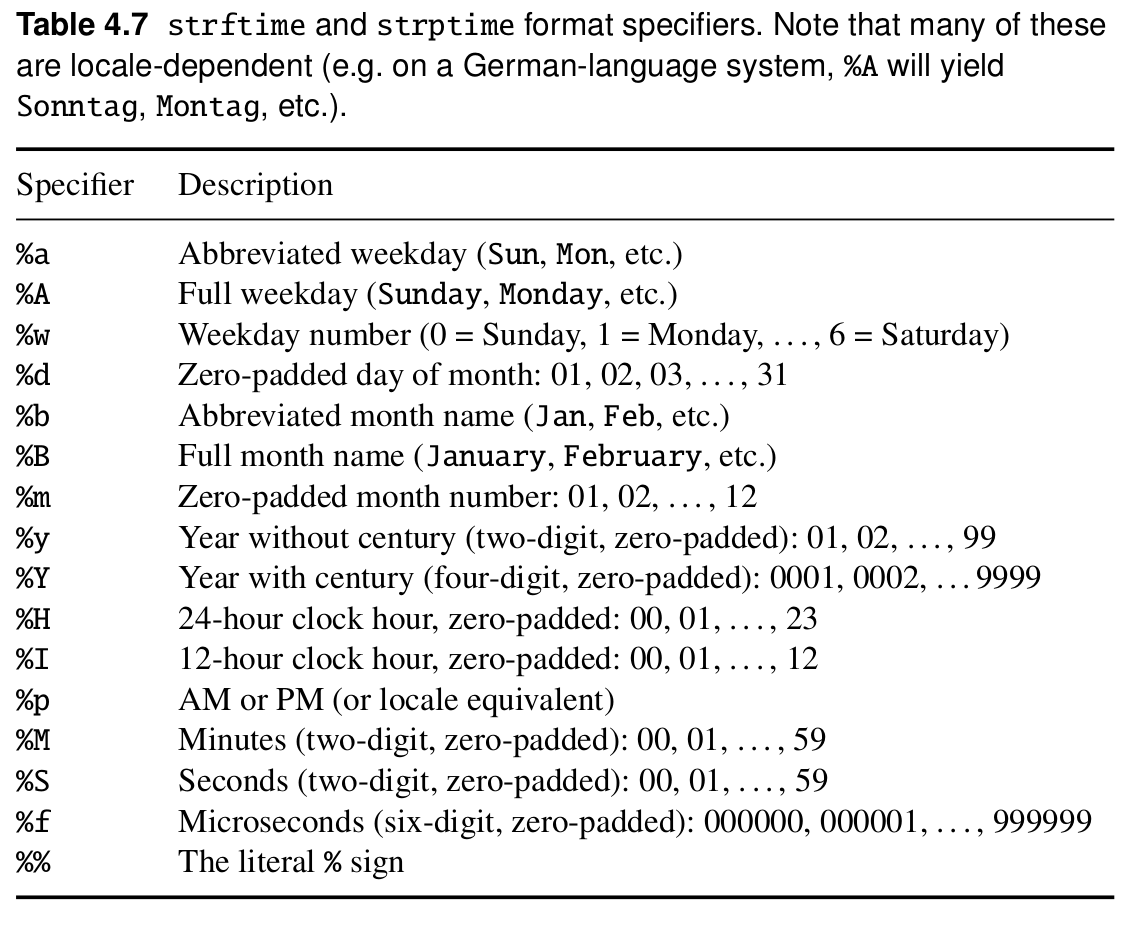

In [ ]:
nascimento = datetime(1986,7,10,20,30)

In [ ]:
nascimento.strftime('%A, %d %B %Y')

In [ ]:
nascimento.strftime('%A, %d %B %Y (%H:%M)')

In [ ]:
nascimento.strftime('%A, %d %B %Y (%Hh %Mmin)')

Exemplo: Paradoxo do aniversário.

Qual é a probabilidade de encontrarmos dois indivíduos nascidos no mesmo dia num grupo de 23 pessoas?

In [ ]:
import random
import numpy as np

from datetime import date
from matplotlib import pyplot as plt

In [ ]:
data_ini = date(1,1,1)
data_fim = date(1,12,31)

In [ ]:
data_ini.toordinal(),data_fim.toordinal()

In [ ]:
date.fromordinal(1),date.fromordinal(365)

In [ ]:
data_teste = date.fromordinal(random.randint(data_ini.toordinal(),data_fim.toordinal()))

In [ ]:
data_teste

In [ ]:
data_teste.day,data_teste.month

In [ ]:
def nascimento_aleatorio():

    data_aleatoria = date.fromordinal(random.randint(1,365))

    return (data_aleatoria.day, data_aleatoria.month)

In [ ]:
datas = [nascimento_aleatorio() for _ in range(23)]

In [ ]:
sorted(datas)

In [ ]:
len(datas)

In [ ]:
set_dates = set(datas)

In [ ]:
len(set_dates)

In [ ]:
len(set_dates)<len(datas)

In [ ]:
def verifica_datas(n=23):
    datas = [nascimento_aleatorio() for _ in range(n)]
    set_dates = set(datas)

    return 1 if len(set_dates)<len(datas) else 0

In [ ]:
np.mean(np.asarray([verifica_datas() for _ in range(10000)]))

In [ ]:
ns = np.arange(1,100)

fracs = [np.mean(np.asarray([verifica_datas(ns_) for _ in range(10000)]))
         for ns_ in ns]

In [ ]:
#habilitar font Helvetica
import matplotlib as mpl
from matplotlib import font_manager as fm

# !wget http://pfi.uem.br/25anos/files/Helvetica.zip
# !unzip Helvetica.zip

fm.fontManager.addfont('Helvetica.ttf')
mpl.rc('font', family='Helvetica')

# rcparams = {'font.family': 'sans-serif',
#             'font.sans-serif': ['Helvetica'],
#             'axes.labelsize': 28,
#             'axes.titlesize': 28,
#             'legend.fontsize': 20,
#             'ytick.right': 'off',
#             'xtick.top': 'off',
#             'ytick.left': 'on',
#             'xtick.bottom': 'on',
#             'xtick.labelsize': '25',
#             'ytick.labelsize': '25',
#             'axes.linewidth': 2.5,
#             'xtick.major.width': 1.8,
#             'xtick.minor.width': 1.8,
#             'xtick.major.size': 10,
#             'xtick.minor.size': 5,
#             'xtick.major.pad': 10,
#             'xtick.minor.pad': 10,
#             'ytick.major.width': 1.8,
#             'ytick.minor.width': 1.8,
#             'ytick.major.size': 10,
#             'ytick.minor.size': 5,
#             'ytick.major.pad': 10,
#             'ytick.minor.pad': 10,
#             'axes.labelpad': 15,
#             'axes.titlepad': 15,
#             'axes.spines.right': False,
#             'axes.spines.top': False
#             }
# mpl.rcParams.update(rcparams)

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(ns,fracs,'-', lw=4, color='#54278f', alpha=0.7)
plt.title('Paradoxo do Aniversário')
plt.xlabel('Número de pessoas, $n$')
plt.ylabel('Probabilidade de haver duas pessoas nascidas\n'\
            + 'no mesmo dia e mês num grupo com $n$ pessoas')
plt.axvline(23,ymax=0.5,color='#202020',dashes=(5,3))
plt.axhline(0.5,xmax=0.25,color='#202020',dashes=(5,3))

plt.plot([23],[0.5],'*',ms=30,color='#1b7837')
plt.text(25,0.5,' Para 23 pessoas a probabilidade é de 50%!',
         fontsize=20,ha='left',va='center',
         color='#1b7837')